https://ftmscan.com/address/0x49c68eDb7aeBd968F197121453e41b8704AcdE0C#readContract


In [4]:
from locallib import *
print(w3.isConnected())

current block 30677710


In [1]:
## test
w3.eth.get_block_number()

True


30487169

In [2]:
addrD = {
    'mooScreamEth-vault':"0x0a03D2C1cFcA48075992d810cc69Bd9FE026384a",
    'mooScreamEth-strat':"0x328bDD271F8987037D935d87cd36d8AcE58dBD34",
    'scweth':'0xc772ba6c2c28859b7a0542faa162a56115ddce25',
    'eth':'0x74b23882a30290451A17c44f4F05243b6b58C76d',
    
    'btc':"0x321162Cd933E2Be498Cd2267a90534A804051b11", # 8 decimals
    "usdc":"0x04068da6c83afcfa0e13ba15a6696662335d5b75", # 6 decimals
    "mim":"0x82f0b8b456c1a451378467398982d4834b6829c1", # 18
    "dai":"0x8d11ec38a3eb5e956b052f67da8bdc9bef8abf3e", # 18
}

In [3]:
# API calls
make_apicall = lambda apicall: requests.get(apicall).json()['result']
def get_contract(addr):
    """ 
    given address
    returns web3 contract 
    """
    call = "https://api.ftmscan.com/api?module=contract&action=getabi&"
    call += "address=%s&apikey=%s"%(addr,fantomAPI)
    abi = make_apicall(call)
    return w3.eth.contract(address=addr, abi=abi)

In [4]:
## get balance
def get_bal(addr1,addr2=None,delta_blocknums=10**5,vv=False):
    """
    given address returns balance over time
    addr1: token address
    addr2: wallet address (e.g. vault or strat address)
        if none, call addr1.balance()
        else, call addr1.balanceof(addr2)
    """
    data = []
    bn = w3.eth.get_block_number() # current block num
    ct = get_contract(addr1)
    while True:
        if vv: print(bn)
        bn -= delta_blocknums
        try:
            if addr2==None:
                bal = ct.functions.balance().call(block_identifier=bn)
            else:
                bal = ct.functions.balanceOf(addr2).call(block_identifier=bn)
            data.append(bal)
        except:
            break
    data.reverse()
    return data

In [5]:
bal_eth = get_bal(addrD['eth'],addrD['mooScreamEth-strat'],delta_blocknums=10**5)

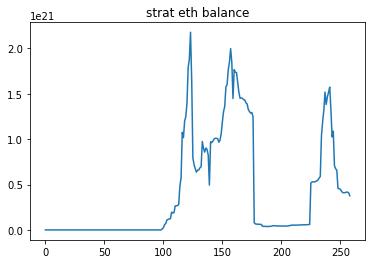

In [6]:
plt.title('strat eth balance')
plt.plot(bal_eth)

In [7]:
bal_sceth = get_bal(w3.toChecksumAddress(addrD['scweth']),addrD['mooScreamEth-strat'],delta_blocknums=10**5)

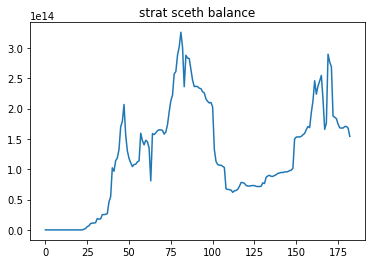

In [8]:
plt.title('strat sceth balance')
plt.plot(np.array(bal_sceth))

In [10]:
bal = get_bal(addrD['mooScreamEth-vault'])

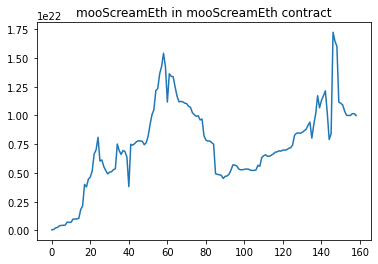

In [11]:
plt.title('mooScreamEth in mooScreamEth contract')
plt.plot(ma(bal,1))

# Notes
### not entirely clear why there are 3 balances.
- balance of strat contract with eth and sceth
- balance of moo token (receipt)
- i think sceth yields eth interest
- which is harvested into stract contract

### I think I could use discrepancies to calaculate deployed capital vs held capital